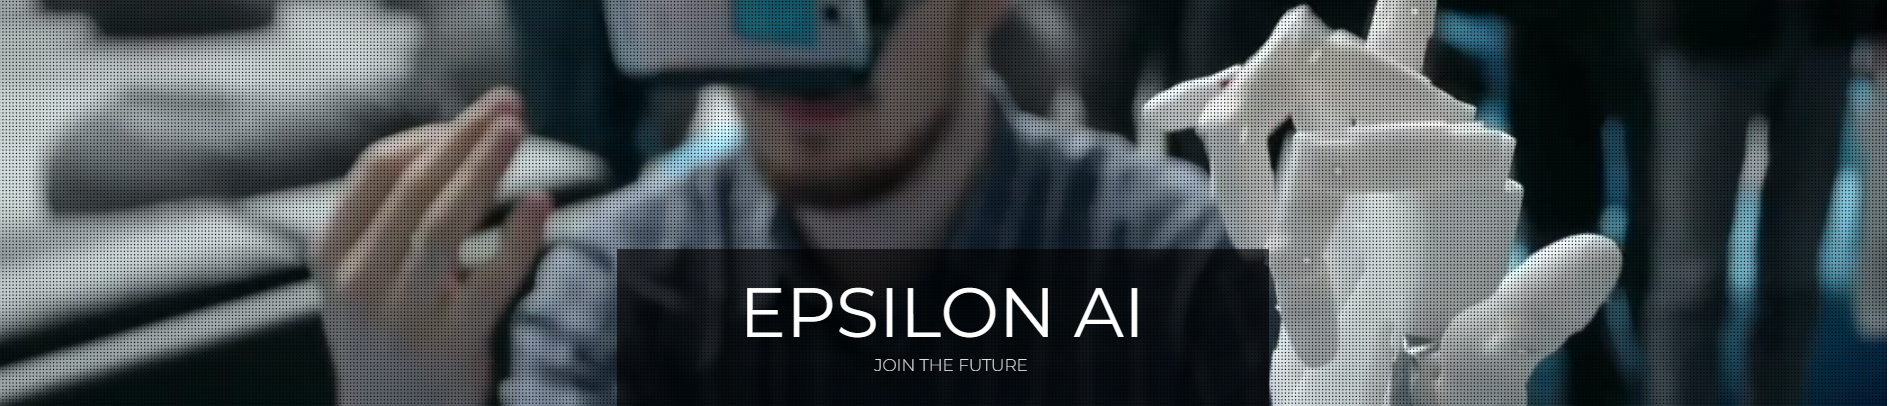
# MID Project : DataCo Supply Chain
* `Project Name :` DataCo Supply Chain
* `Employee Name :` Osama SAAD

## 1) About Data
* `Type`	:  Type of transaction made
* `Days for shipping (real)`:  Actual shipping days of the purchased product
* `Days for shipment (scheduled)`:  Days of scheduled delivery of the purchased product
* `Benefit per order`:  Earnings per order placed
* `Sales per customer`:  Total sales per customer made per customer
* `Delivery Status`	:  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
* `Late_delivery_risk`:  Categorical variable that indicates if sending is late (1), it is not late (0).
* `Category Id`	:  Product category code
* `Category Name`:  Description of the product category
* `Customer City`:  City where the customer made the purchase
* `Customer Country`:  Country where the customer made the purchase
* `Customer Email`:  Customer's email
* `Customer Fname`:  Customer name
* `Customer Id`	:  Customer ID
* `Customer Lname`:  Customer lastname
* `Customer Password`:  Masked customer key
* `Customer Segment`:  Types of Customers: Consumer , Corporate , Home Office
* `Customer State`:  State to which the store where the purchase is registered belongs
* `Customer Street`	:  Street to which the store where the purchase is registered belongs
* `Customer Zipcode`:  Customer Zipcode
* `Department Id`:  Department code of store
* `Department Name`	:  Department name of store
* `Latitude`:  Latitude corresponding to location of store
* `Longitude`:  Longitude corresponding to location of store
* `Market`:  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
* `Order City`:  Destination city of the order
* `Order Country`:  Destination country of the order
* `Order Customer Id`:  Customer order code
* `order date (DateOrders)`	:  Date on which the order is made
* `Order Id`:  Order code
* `Order Item Cardprod Id`:  Product code generated through the RFID reader
* `Order Item Discount`	:  Order item discount value
* `Order Item Discount Rate`:  Order item discount percentage
* `Order Item Id`:  Order item code
* `Order Item Product Price`:  Price of products without discount
* `Order Item Profit Ratio`	:  Order Item Profit Ratio
* `Order Item Quantity`	:  Number of products per order
* `Sales`:  Value in sales
* `Order Item Total`:  Total amount per order
* `Order Profit Per Order`:  Order Profit Per Order
* `Order Region`:  Region of the world where the order is delivered
* `Order State`	:  State of the region where the order is delivered
* `Order Status`:  Order Status 
* `Product Card Id`	:  Product code
* `Product Category Id`	:  Product category code
* `Product Description`	:  Product Description
* `Product Image`:  Link of visit and purchase of the product
* `Product Name`:  Product Name
* `Product Price`:  Product Price
* `Product Status`:  Status of the product stock :If it is 1 not available , 0 the product is available 
* `Shipping date (DateOrders)`:  Exact date and time of shipment
* `Shipping Mode`:  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

## 2) Import libraries & Handling Columns

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
path = 'DataCoSupplyChainDataset.csv'

try:
    df = pd.read_csv(path)
except Exception as E:
    print(E)

`Solution referance :` https://itsmycode.com/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-start-byte/

In [ ]:
df = pd.read_csv(path ,encoding="ISO-8859-1", low_memory=False)

In [ ]:
pd.set_option("display.max_columns", len(df.columns.tolist()))
pd.options.display.float_format ='{:,.2f}'.format
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
print(df.shape)
df.head(2)

## 3) Data Exploration

In [ ]:
df.sample(1).T

In [ ]:
df.describe().T

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
dic_O = {}
for i in M_df.select_dtypes(include="O").columns:
    dic_O[i] = M_df[i].nunique()

dic_N = {}
for i in M_df.select_dtypes(include="number").columns:
    dic_N[i] = M_df[i].nunique()

Cat_details = pd.DataFrame.from_dict(dic_O, orient='index',columns=['total']).sort_values('total',ascending=False).reset_index()
Num_details = pd.DataFrame.from_dict(dic_N, orient='index',columns=['total']).sort_values('total',ascending=False).reset_index()
display(Cat_details) , display(Num_details)

## 4) Handling Data

### 1/4) Check/Handling Null & Duplicate

In [ ]:
# Check Null
def NAN (df):
    return df.isna().sum().reset_index(name='NAN_Count').query('NAN_Count > 0')
NAN(df)

* `Drop Columns as no longer to use them`

In [ ]:
df.drop(['customer_lname' , 'customer_zipcode' , 'order_zipcode' , 'product_description'] , axis=1 , inplace=True)

In [ ]:
NAN(df)

In [ ]:
# Duplicate
df.duplicated().sum()

* `No Duplicates`

In [ ]:
df.head(1)

### 2/4) Feature Engineering

In [ ]:
df.info()

In [ ]:
# Explore
df['days_for_shipment_(scheduled)'].dtype

In [ ]:
# Test
df['latitude'].astype('float32')

In [ ]:
df['order_date_(dateorders)'] = pd.to_datetime(df['order_date_(dateorders)'])
df['shipping_date_(dateorders)'] = pd.to_datetime(df['shipping_date_(dateorders)'])

In [ ]:
df['order_date_(year)'] = df['order_date_(dateorders)'].dt.year
df['order_date_(month)'] = df['order_date_(dateorders)'].dt.month
df['order_date_(day)'] = df['order_date_(dateorders)'].dt.day_name()
df['order_date_(d_n)'] = df['order_date_(dateorders)'].dt.day

df['shipping_date_(year)'] = df['shipping_date_(dateorders)'].dt.year
df['shipping_date_(month)'] = df['shipping_date_(dateorders)'].dt.month
df['shipping_date_(day)'] = df['shipping_date_(dateorders)'].dt.day_name()
df['shipping_date_(d_n)'] = df['shipping_date_(dateorders)'].dt.day

In [ ]:
df[['order_date_(year)' , 'order_date_(month)' , 'shipping_date_(year)' , 'shipping_date_(month)','order_date_(d_n)','shipping_date_(d_n)']].head(4)

In [ ]:
df['days_diff(schad_vs_real)'] = df['days_for_shipment_(scheduled)']-df['days_for_shipping_(real)']
df['days_diff(schad_vs_real)'].unique()

In [ ]:
# Cast all int/float to 32 instated of 64
for i in df.columns:
    if df[i].dtype == 'int64':
        df[i] = df[i].astype('int32')
    elif df[i].dtype == 'float64':
        df[i] = df[i].astype('float32')
    else:
        df[i] = df[i]
df.info()

In [ ]:
df['order_profit_status'] = df['order_profit_per_order'].apply(lambda x : "Loss" if x < 0 else "Gain")
df['order_profit_status'].value_counts()

In [ ]:
msk = df['order_profit_status'].value_counts().reset_index(name='count')
px.pie(msk , values='count',names='index',width=500 , height=500).update_traces(textinfo='percent+value')

In [ ]:
def lating (data):
    if data == 0:
        return "Timely"
    elif data > 0:
        return "Early"
    else:
        return "Late"
df['days_shipping(status)'] = df['days_diff(schad_vs_real)'].apply(lating)

In [ ]:
msk = df['days_shipping(status)'].value_counts().reset_index(name='count')
px.pie(msk , values='count',names='index',width=500 , height=500).update_traces(textinfo='percent+value')

### 3/4) Check categorization counts

In [ ]:
for i in df.columns:
    print(i  ,':', df[i].nunique())
    print("_"*50)

In [ ]:
# There is duplicate in category_name (Electronics) as it has two diff ids (37 , 13)
df[(df.category_id == 37) | (df.category_id == 13)][['category_id' , 'category_name']].value_counts().reset_index(name='count')

#### 3/4-A) Category_id/name issue with real market indication (like beck to domain owner)

In [ ]:
df.category_id.unique().shape , df.category_name.unique().shape

In [ ]:
df[(df.category_id == 37) | (df.category_id == 13)][['category_name','category_id','product_name']].value_counts().reset_index(name='count').sort_values('category_id')

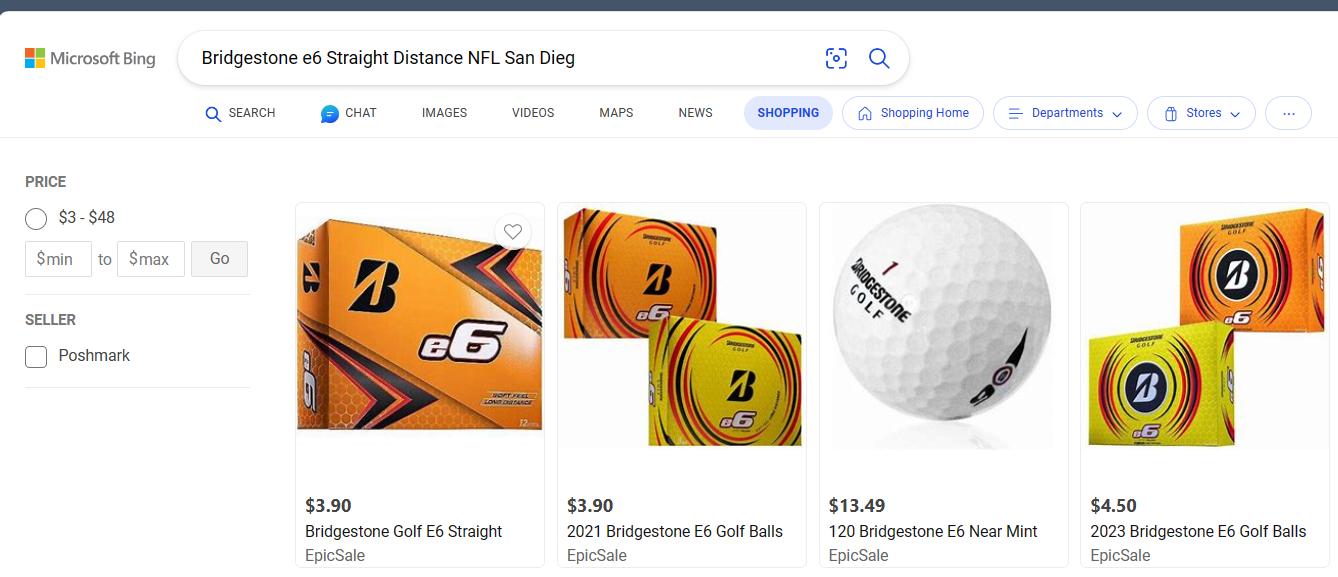

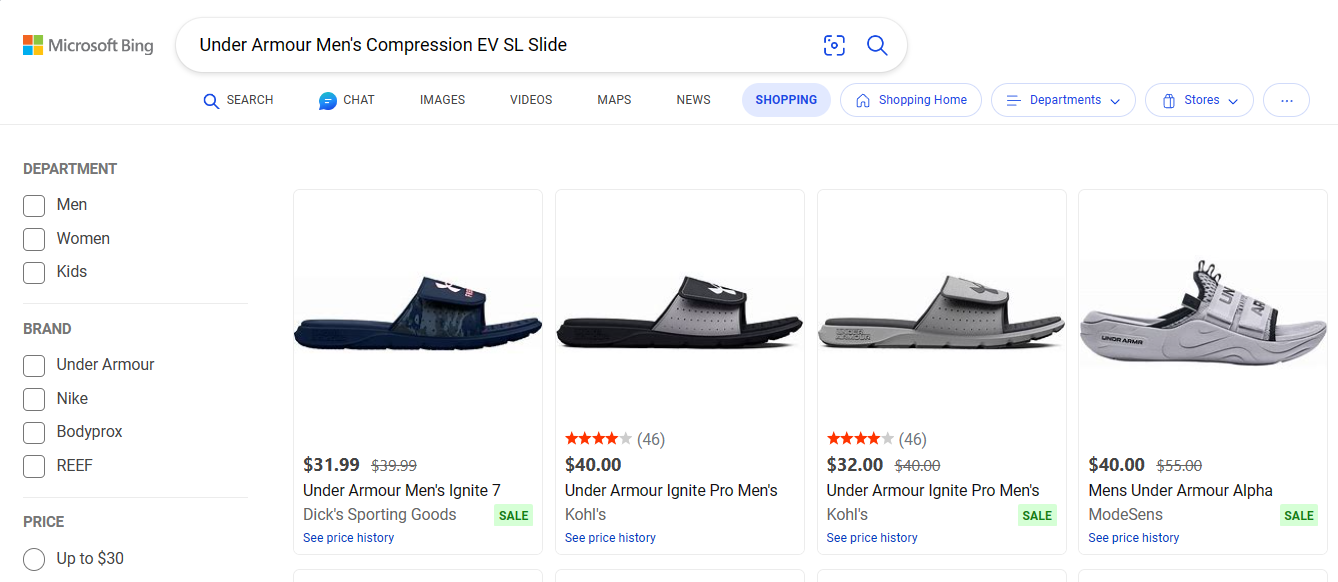

In [ ]:
df[df.product_name == "Under Armour Women's Ignite Slide"][['category_name']].groupby('category_name').value_counts().reset_index(name='count')

In [ ]:
# Check "Titleist" word in category
df[df['product_name'].str.contains(r'\w*Titleist\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')

In [ ]:
# Check "Under Armour" word in category
df[df['product_name'].str.contains(r'\w*Under Armour\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')

In [ ]:
# Check "Women" word in category
df[df['category_name'].str.contains(r'\w*Women\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')

In [ ]:
# Check "Men" word in category
df[df['category_name'].str.contains(r'\w*wom\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')

In [ ]:
# Check "kid" word in category
df[df['category_name'].str.contains(r'\w*kid\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')

In [ ]:
# Explore the countable analysis  :
Electronic_row_count = df[df.category_name == 'Electronics'].shape[0]
DF_row_count = df.shape[0]
Total_Sales_Electronic = df[df.category_name == 'Electronics']['order_item_total'].sum()
Total_All_Sales = df['sales'].sum()

print(f'Total_All_Sales : {round(Total_All_Sales,2)}')
print(f'Total_Sales_Electronic : {round(Total_Sales_Electronic,2)}',f'= {round(Total_Sales_Electronic/Total_All_Sales * 100,2)}% from total sales')
print(f'Electronic_row_count:{Electronic_row_count}' , f', And DF_row_count: {DF_row_count} =' , round(Electronic_row_count/DF_row_count*100,2),"%")

#### (My comment & action) : After categorization count check :
* There are items allocated to wrong category = "Electronic" , 
    - `After check (category vs real market data) found that (Category ID "37")  shoud be allocated to ("35 - Golf Golves").`
    - `And ("Category ID 13") should be allocated to ("29 - Shop By Sports").`
* therefore with considrate keep the data as domian, created new Feature "New Cateogry" with above update to use it in our EDA.

In [ ]:
df['new_category_name'] = df.apply(lambda x: 'Golf Gloves' if x['category_id'] == 37 else ('Shop By Sport' if x['category_id'] == 13 else x['category_name']), axis=1)

In [ ]:
df[(df.category_id == 13) | (df.category_id == 37)][['category_id' , 'category_name' , 'new_category_name']].value_counts().reset_index(name = 'count')

In [ ]:
df[df['new_category_name']=='Electronics']['new_category_name'].value_counts().reset_index()

In [ ]:
df[df.category_name == 'Golf Gloves'][['category_id','category_name']].head(1)

In [ ]:
df[['sales_per_customer','order_item_total','sales','product_price','benefit_per_order','order_profit_per_order']].agg(['mean','median','max'])

In [ ]:
df[['type','sales_per_customer','order_item_total','sales','product_price','benefit_per_order','order_profit_per_order']].head(4)

* sales_per_customer = order_item_total
* sales = product_price
* benefit_per_order = order_profit_per_order
* drop : sales_per_customer & sales & benefit_per_order

### 4/4) Drop Unnecessary Columns

In [ ]:
try:
    df.drop(['customer_email','customer_fname',
             'customer_password','customer_street',
             'order_customer_id','order_item_cardprod_id',
             'order_item_id','order_item_product_price','product_card_id','product_image',
             'department_id'],axis=1 , inplace=True)
except Exception as EX:
    print(EX) 

In [ ]:
df[['type','order_status','order_city','order_country',
    'new_category_name','customer_city','customer_country','department_name',
    'type','order_item_quantity','product_price',
    'order_item_discount_rate','order_item_discount','order_item_total',
    'order_item_profit_ratio','order_profit_per_order','order_profit_status']].head(5)

## 5) Correlation

In [ ]:
# Ord_df , Ship_df , Cust_df , Sale_df , Mstr_df

In [ ]:
msk = df[['order_id','late_delivery_risk','days_diff(schad_vs_real)','days_for_shipping_(real)','days_for_shipment_(scheduled)'
          ,'customer_id','product_price','order_item_quantity','order_item_discount_rate','order_item_discount','order_item_total'
          ,'order_item_profit_ratio', 'order_profit_per_order','product_status']].corr()

px.imshow(msk , width=1300 , height=1300 , text_auto=True,color_continuous_scale=px.colors.colorbrewer.Spectral)

## 6) Check Outliers

In [ ]:
df.select_dtypes(include= 'number').columns.tolist()

In [ ]:
msk = [ 'late_delivery_risk',
    'days_for_shipment_(scheduled)',
    'order_item_quantity',
    'days_for_shipping_(real)',
    'order_item_discount_rate',
    'product_price',
    'order_item_profit_ratio',
    'sales',
    'order_item_discount',
    'order_item_total',
    'order_profit_per_order','product_status']

for i in msk:
    print(i ,':', df[i].nunique(),'---', df[i].dtype)

In [ ]:
# Testing dask data fram (deal with big data)
import dask.dataframe as dd
dfd = dd.from_pandas(df,npartitions=10)

In [ ]:
def dist_box(x):
    print(f'{x} , Data type is :', df[x].dtype)
    print("Number of Unique Values are : ", df[x].nunique(),'\nDescribe :')
    print(df[x].describe())
    fig = px.histogram(df , x=x , marginal='box' , width=700 , height=400, text_auto=True , title =f'distrubtion of {x}')
    fig.show()
    
def pie_chart(x):
    msk = df[x].value_counts().reset_index(name='count')
    fig = px.pie(msk, values='count' , names='index',width=400 , height=400,title=f'{x}').update_traces(textinfo='percent+value')
    fig.show()

def dist_seaborn(x):
    print(f'{x} , Data type is :', df[x].dtype)
    print("Number of Unique Values are : ", df[x].nunique(),'\nDescribe :')
    print(df[x].describe())
    sns.histplot(df , x = x ,kde =True )
    plt.show()

def boxplot(x):
    sns.boxplot(df, y=x)
    plt.show()

In [ ]:
dist_seaborn(msk[0])
pie_chart(msk[0])

In [ ]:
dist_box(msk[1])
pie_chart(msk[1])

In [ ]:
dist_box(msk[2])
pie_chart(msk[2])

In [ ]:
dist_box(msk[3])
pie_chart(msk[3])

In [ ]:
dist_box(msk[4])
boxplot(msk[4])

In [ ]:
dist_seaborn(msk[5])
boxplot(msk[5])

In [ ]:
dist_seaborn(msk[6])
boxplot(msk[6])

In [ ]:
dist_seaborn(msk[7])
boxplot(msk[7])

In [ ]:
dist_seaborn(msk[8])
boxplot(msk[8])

In [ ]:
dist_seaborn(msk[9])
boxplot(msk[9])

In [ ]:
dist_seaborn(msk[10])
boxplot(msk[10])

In [ ]:
dist_seaborn(msk[11])
boxplot(msk[11])

In [ ]:
df.product_status.value_counts()

* No need for product_status

In [ ]:
df.drop('product_status',axis=1,inplace=True)

### 5/1) Outlires Calculation & Comments

In [ ]:
from datasist.structdata import detect_outliers

outliers_dict = {}
for i in df.select_dtypes(include='number').columns:
    outliers_indices = detect_outliers(df, 0, [i])
    outliers_dict[i] = len(outliers_indices)

df_outliers = pd.DataFrame.from_dict(outliers_dict, orient='index', columns=['Outliers']).sort_values('Outliers',ascending=False).reset_index()
df_outliers

In [ ]:
px.histogram(df_outliers , x = 'index' , y = 'Outliers' , text_auto=True , title = 'Outliers count' ,width=1200 , height=800,color='index')

In [ ]:
df[['order_profit_per_order' , 'benefit_per_order']]

In [ ]:
df.drop('benefit_per_order',axis=1 , inplace=True)

In [ ]:
df.head(2)

### `5/4) Organizing Data Selection for Data Analysis by subjects :`
- *_("Orders" , "Shipments" , "Customers" , 'Sales') for EDA_*

- Orders
    - 'order_id'
    - 'order_status'
    - 'order_date_(dateorders)'
    - 'order_date_(year)'
    - 'order_date_(month)'
    - 'order_date_(day)'
    - 'market'
    - 'order_city'
    - 'order_country'
    - 'order_region'
    - 'order_state'
    - 'department_name'
    - 'new_category_name'
    - 'product_name'
    - 'order_item_discount'
    - 'order_item_total'
    - 'order_profit_per_order'
    - 'order_profit_status'

- Shipments
    - 'shipping_mode'
    - 'days_shipping(status)'
    - 'delivery_status'
    - 'late_delivery_risk'
    - 'shipping_date_(year)'
    - 'shipping_date_(month)'
    - 'shipping_date_(day)'
    - 'shipping_date_(dateorders)'
    - 'days_diff(schad_vs_real)'
    - 'days_for_shipping_(real)'
    - 'days_for_shipment_(scheduled)'

- Customers
    - 'customer_id'
    - 'customer_segment'
    - 'customer_city'
    - 'customer_state'
    - 'customer_country'
    - 'latitude'
    - 'longitude'
    - 'order_item_discount'
    - 'order_item_total'
    - 'order_profit_per_order'
    - 'order_profit_status'

- Sales
    - 'type'
    - 'order_profit_status'
    - 'product_price'
    - 'order_item_quantity'
    - 'order_item_discount_rate'
    - 'order_item_discount'
    - 'order_item_total'
    - 'order_item_profit_ratio'
    - 'order_profit_per_order'
    


In [ ]:
M_df = df[['type','market','customer_segment' ,'order_status','delivery_status','late_delivery_risk'
            ,'shipping_mode','days_shipping(status)','order_region','order_profit_status'
        
            ,'order_id'
            ,'order_date_(dateorders)','shipping_date_(dateorders)'
            ,'order_date_(year)','order_date_(month)','order_date_(day)'
              
            ,'shipping_date_(year)','shipping_date_(month)','shipping_date_(day)'
            ,'days_for_shipment_(scheduled)','days_for_shipping_(real)','days_diff(schad_vs_real)'
            
            ,'customer_id'
            ,'customer_city','customer_state','customer_country','latitude','longitude'
              
            ,'department_name','new_category_name','product_name'
            ,'order_city','order_country','order_state'
              
            ,'product_price'
            ,'order_item_quantity','order_item_discount_rate','order_item_discount'
            ,'order_item_total','order_item_profit_ratio','order_profit_per_order',]]

# Orders 
Ord_df = df[['order_date_(dateorders)'
            ,'order_date_(year)','order_date_(month)','order_date_(day)'
            ,'market','order_city','order_country','order_region'
            ,'order_state','department_name','new_category_name'
            ,'product_name','order_item_discount','order_item_total'
            ,'order_profit_per_order','order_profit_status']]

# Shipments
Ship_df = df[['type','shipping_mode','days_shipping(status)','delivery_status'
           ,'late_delivery_risk','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)'
           ,'shipping_date_(dateorders)','days_diff(schad_vs_real)','days_for_shipping_(real)','days_for_shipment_(scheduled)']]

# Customers
Cust_df = df[['type','order_id','order_status','customer_id','customer_segment','customer_city'
           ,'customer_state','customer_country','latitude','longitude'
           ,'order_item_discount','order_item_total','order_profit_per_order'
           ,'order_profit_status','order_profit_status']]

# Sales
Sale_df = df[['type','order_profit_status','product_price'
            ,'order_item_quantity','order_item_discount_rate','order_item_discount'
            ,'order_item_total','order_item_profit_ratio','order_profit_per_order','order_profit_status']]

In [ ]:
M_df.head()

In [ ]:
df.order_state.nunique()

## 7) EDA

### A) EDA Plan :
* Order Analysis
* Shipment Analysis
* Customer Analysis
* Sales Analysis

In [ ]:
df[['type','order_status','order_city','order_country','order_region',
    'new_category_name','customer_city','customer_country','department_name',
    'order_item_quantity','product_price',
    'order_item_discount_rate','order_item_discount','order_item_total',
    'order_item_profit_ratio','order_profit_per_order','order_profit_status']].head(5)

#### 7/1) Order Analysis

In [ ]:
# 'type','market','customer_segment' ,'order_status','delivery_status','late_delivery_risk','shipping_mode','days_shipping(status)','order_region','order_profit_status'

##### How many..? : 
- ('type','market','customer_segment' ,'order_status','delivery_status','late_delivery_risk','shipping_mode','days_shipping(status)','order_region','order_profit_status')

In [ ]:
msk = df.groupby(['type','market','customer_segment' ,'order_status','delivery_status','late_delivery_risk','shipping_mode','days_shipping(status)','order_region'
                  ,'order_profit_status'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()

In [ ]:
msk.head(1)

In [ ]:
# type vs delivery_status
px.pie(msk , names= 'type' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')

In [ ]:
M_df.head(1)

In [ ]:
# customer_segment vs delivery_status
fig_1 = px.pie(msk , names= 'market' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')
fig_2 = px.histogram(msk , x= 'market' , y='order_id' ,color= 'order_status',barmode='group' , width=1300 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# customer_segment vs delivery_status
fig_1 = px.pie(msk , names= 'customer_segment' , values='order_id', width=600 , height=600).update_traces(textinfo='percent+value')
fig_2 = px.histogram(msk , x= 'customer_segment' , y='order_id' ,color= 'order_status',barmode='group' , width=900 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# order_status vs delivery_status
fig_1 = px.pie(msk , names= 'order_status' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')
fig_2 = px.histogram(msk , x= 'order_status' , y='order_id' ,color= 'delivery_status',barmode='group' , width=900 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# customer_segment vs delivery_status
fig_1 = px.pie(msk , names= 'customer_segment' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')
fig_2 = px.histogram(msk , x= 'customer_segment' , y='order_id' ,color= 'delivery_status',barmode='group' , width=900 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# late_delivery_risk vs delivery_status
fig_1 = px.pie(msk , names= 'late_delivery_risk' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')
fig_2 = px.histogram(msk , x='delivery_status'  , y='order_id' ,color= 'late_delivery_risk' , width=900 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# order_region vs delivery_status
px.histogram(msk , x= 'order_region' , y='order_id' ,color= 'delivery_status',barmode='group' , width=1200 , height=500,text_auto=True)

In [ ]:
# order_(year) in monthes timeline
line = df.groupby(['order_date_(year)','order_date_(month)'])[['order_id']].count().sort_values(['order_date_(year)','order_date_(month)']).reset_index()
px.line(line , x = 'order_date_(month)' , y='order_id' , color='order_date_(year)')

In [ ]:
M_df.head(1)

In [ ]:
# 'order_profit_status' in month
for i in [2015,2016,2017,2018]:
    x = df[df['order_date_(year)'] == i].groupby(['order_date_(year)','order_date_(month)','order_profit_status'])[['order_profit_per_order']].sum().sort_values(['order_date_(year)','order_date_(month)']).reset_index()
    fig = px.histogram(x , x = 'order_date_(month)' , y='order_profit_per_order' , color='order_profit_status',barmode='group',nbins=12,width=900,height=400 , text_auto=True, title = f'monthly Gain/Loss in {i}')
    fig.show()

In [ ]:
# 'order_date_(day)' vs Year
Q1 = M_df.groupby(['order_date_(day)','order_date_(year)'])[['order_id']].count().sort_values('order_date_(year)').reset_index()
px.histogram(Q1 , x= 'order_date_(day)' , y='order_id' ,color= 'order_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'Total Orders per days in all years')

In [ ]:
# Total Order vs order_status in all years
Q3 = M_df.groupby(['order_status','order_date_(year)'])[['order_id']].count().sort_values('order_date_(year)').reset_index()
px.histogram(Q3 , x= 'order_status' , y='order_id' ,color= 'order_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'Total Order vs order_status in all years')

In [ ]:
# order_profit_status vs Total Orders in order_date_(year)
Q6 = M_df.groupby(['order_profit_status','order_date_(year)'])[['order_id']].count().sort_values('order_date_(year)').reset_index()
px.histogram(Q6 , x= 'order_profit_status' , y='order_id' ,color= 'order_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'order_profit_status vs Total Orders in order_date_(year)')

In [ ]:
# shipping_status vs Total Orders in order_date_(year)
Q5 = M_df.groupby(['days_shipping(status)','order_date_(year)'])[['order_id']].count().sort_values('order_date_(year)').reset_index()
px.histogram(Q5 , x= 'days_shipping(status)' , y='order_id' ,color= 'order_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'shipping_status vs Total Orders in order_date_(year)')

##### What Top ..?

In [ ]:
M_df.head(2)

In [ ]:
# Top 10 Order Cities in Order QTY
Top_1 = M_df.order_country.value_counts().nlargest(10).reset_index()
px.histogram(Top_1 , x='index' , y='order_country' , width=800 , height=500, text_auto=True,color='index',title='Top 10 Order Cities in Order QTY')

In [ ]:
# Top 10 Order Region in Order QTY
Top_2 = M_df.order_region.value_counts().nlargest(10).reset_index()
px.histogram(Top_2 , x='index' , y='order_region' , width=800 , height=500, text_auto=True,color='index',title='Top 10 Order Region in Order QTY')

In [ ]:
# Top 10 Order country in Order QTY with delivery_status
Top_3 = M_df.groupby(['delivery_status','order_country'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_3 , x='order_country' , y= 'order_id', width=800 , height=500, text_auto=True,color='delivery_status',barmode='group',title='Top 10 Order country in Order QTY with delivery_status')

In [ ]:
# Top 10 Order Region in Order QTY with delivery_status
Top_4 = M_df.groupby(['delivery_status','order_region'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_4 , x='order_region' , y= 'order_id', width=800 , height=500, text_auto=True,color='delivery_status',barmode='group',title='Top 10 Order Region in Order QTY with delivery_status')

In [ ]:
# Top 10 Order country in Order QTY with customer_segment
Top_5 = M_df.groupby(['customer_segment','order_country'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_5 , x='customer_segment' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_country',barmode='group',title='Top 10 Order country in Order QTY with customer_segment')

In [ ]:
# Top 10 Order Reagion in Order QTY with customer_segment
Top_6 = M_df.groupby(['customer_segment','order_region'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_6 , x='customer_segment' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_region',barmode='group',title='Top 10 Order region in Order QTY with customer_segment')

In [ ]:
# Top 10 order country in Order QTY by type
Top_9 = M_df.groupby(['type','order_country'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_9 , x='type' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_country',barmode='group',title='Top 10 Order country in Order QTY with days_shipping(status)')

In [ ]:
# Top 10 order country in Order QTY by type
Top_10 = M_df.groupby(['type','order_region'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_10 , x='type' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_region',barmode='group',title='Top 10 order country in Order QTY by type')

In [ ]:
# Top 10 order country in Order QTY by market
Top_11 = M_df.groupby(['market','order_country'])[['order_id']].count().nlargest(10 , 'order_id').sort_values('order_id' , ascending=False).reset_index()
px.histogram(Top_11 , x='order_country' , y= 'order_id', width=800 , height=500, text_auto=True,color='market',title='Top 10 order country in Order QTY by type')

In [ ]:
# Top 10 order country in Order QTY by order_status
Top_12 = M_df.groupby(['order_status','order_country'])[['order_id']].count().nlargest(10 , 'order_id').sort_values('order_id' , ascending=False).reset_index()
px.histogram(Top_12 , x='order_status' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_country',barmode='group',title='Top 10 order country in Order QTY by type')

In [ ]:
# country in customer country by order_status
Top_12 = M_df.groupby(['order_status','order_country','customer_country','order_profit_status'])[['order_id']].count().sort_values('order_id' , ascending=False).reset_index()
px.histogram(Top_12 , x='customer_country' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_profit_status',barmode='group',title='Top 10 order country in Order QTY by type')

#### 7/2) Shipment Analysis

In [ ]:
# Shipments
Ship_df = df[['type','shipping_mode','days_shipping(status)','delivery_status','order_id'
           ,'late_delivery_risk','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)'
           ,'shipping_date_(dateorders)','days_diff(schad_vs_real)','days_for_shipping_(real)','days_for_shipment_(scheduled)']]
Ship_df.head(1)

In [ ]:
M_df.head(1)

In [ ]:
SQ_1 = M_df['shipping_mode'].value_counts().reset_index()
SQ_1

In [ ]:
SQ_2 = M_df['days_for_shipment_(scheduled)'].value_counts().reset_index()
SQ_2
# shipping_mode is incoding for days_for_shipment_(scheduled)

In [ ]:
SQ_3 = M_df['late_delivery_risk'].value_counts().reset_index()
SQ_3

In [ ]:
SQ_4 = M_df['days_shipping(status)'].value_counts().reset_index()
SQ_4

In [ ]:
SQ_5 = M_df.groupby(['shipping_mode','days_shipping(status)'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()
SQ_5

In [ ]:
M_df.head(1)

In [ ]:
# 'type','market','customer_segment','delivery_status','late_delivery_risk','order_status' ,'shipping_mode','order_region','order_profit_status'
for i in ['type','market','customer_segment','delivery_status','late_delivery_risk','order_status' ,'shipping_mode','order_country','order_region','order_profit_status','shipping_date_(year)',
          'shipping_date_(month)','shipping_date_(day)','customer_country']:
    Q = M_df.groupby([i , 'days_shipping(status)'])[['order_id']].count().sort_values('order_id').reset_index()
    fig_1 = px.histogram(Q , x= 'days_shipping(status)', y ='order_id' , color = i ,barmode='group', text_auto=True , width=900 , height=500 ,title = f'Total orders for days_shipping(status) in {i}')
    fig_1.show()

In [ ]:
# order_(year) in monthes timeline
line = df.groupby(['shipping_date_(year)','shipping_date_(month)'])[['order_id']].count().sort_values(['shipping_date_(year)','shipping_date_(month)']).reset_index()
px.line(line , x = 'shipping_date_(month)' , y='order_id' , color='shipping_date_(year)', title='shipping time line (order ount)')

In [ ]:
M_df.head(1)

In [ ]:
for i in ['shipping_date_(year)','shipping_date_(month)','shipping_date_(day)']:
    Time = M_df.groupby(['shipping_date_(year)','shipping_date_(month)','shipping_date_(day)' , 'days_shipping(status)'])[['order_id']].count().sort_values('order_id' , ascending=False).reset_index()
    fig_1 = px.histogram(Time , x= i, y ='order_id' , color = 'shipping_date_(year)' , barmode='group' ,text_auto=True , width=900 , height=500 ,title = f'Total orders in {i}')
    fig_1.show()

In [ ]:
# delivery_status vs delivery_status
fig_1 = px.pie(M_df , names= 'delivery_status' , values='order_id', width=500 , height=500).update_traces(textinfo='percent+value')
fig_2 = px.histogram(M_df , x= 'delivery_status' , y='order_id' ,color= 'delivery_status', width=900 , height=500,text_auto=True)
fig_1.show() , fig_2.show();

In [ ]:
# days_shipping(status) vs Total Orders
msk = M_df.groupby(['days_shipping(status)'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()
px.pie(msk , names= 'days_shipping(status)' , values='order_id', width=400 , height=400).update_traces(textinfo='percent+value')

In [ ]:
# shipping_mode vs order_status in Total Orders
msk = M_df.groupby(['shipping_mode','order_status'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()
px.histogram(msk , x= 'shipping_mode' , y='order_id' ,color= 'order_status',barmode='group' , width=900 , height=500,text_auto=True)

In [ ]:
# Shipping_(year) in monthes (Bar)
msk = M_df.groupby(['shipping_date_(month)','shipping_date_(year)'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()
px.histogram(msk,x='shipping_date_(month)' , y='order_id',color='shipping_date_(year)',barmode='group',text_auto=True)

In [ ]:
# Top 10 Order QTY per Regionswith days_shipping(status)
Top_8 = M_df.groupby(['days_shipping(status)','order_region'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_8 , x='days_shipping(status)' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_region',barmode='group',title='Top 10 Order QTY per Regionswith days_shipping(status)')

In [ ]:
# Top 10 Order country in Order QTY with days_shipping(status)
Top_7 = M_df.groupby(['days_shipping(status)','order_country'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
px.histogram(Top_7 , x='days_shipping(status)' , y= 'order_id', width=800 , height=500, text_auto=True,color='order_country',barmode='group',title='Top 10 Order country in Order QTY with days_shipping(status)')

In [ ]:
# delivery_status vs Total Orders in shipping_date_(year)
Q4 = M_df.groupby(['delivery_status','shipping_date_(year)'])[['order_id']].count().sort_values('shipping_date_(year)').reset_index()
px.histogram(Q4 , x= 'delivery_status' , y='order_id' ,color= 'shipping_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'delivery_status vs Total Orders in shipping_date_(year)')

In [ ]:
# Total Shipping per days in all years
Q2 = M_df.groupby(['shipping_date_(day)','shipping_date_(year)'])[['order_id']].count().sort_values('shipping_date_(year)').reset_index()
px.histogram(Q2 , x= 'shipping_date_(day)' , y='order_id' ,color= 'shipping_date_(year)',barmode='group' , width=1200 , height=500,text_auto=True , title = 'Total Shipping per days in all years')

In [ ]:
x = M_df.groupby(['shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending = False).reset_index()
px.histogram(x , x ='shipping_date_(year)' , y = 'order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True,width=900 , height=500 ,title='shipping_date_(year) on Profit Status')

In [ ]:
x = M_df.groupby(['shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending = False).reset_index()
px.histogram(x , x ='shipping_date_(month)' , y = 'order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True,width=900 , height=500,title='shipping_date_(Month) on Profit Status')

In [ ]:
x = M_df.groupby(['shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending = False).reset_index()
px.histogram(x , x ='shipping_date_(day)' , y = 'order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True,width=900 , height=500,title='shipping_date_(Day) on Profit Status')

#### 7/3) Category & Customer Analysis

* `Category Analysis`

In [ ]:
M_df.head(1)
# department_name , new_category_name
# product_name
# Locations , Market , Region
# Segment , Type , Profit
# Time Series

In [ ]:
Cat_Profit = M_df.groupby(['new_category_name','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order').reset_index()
px.histogram(Cat_Profit , x='new_category_name' , y='order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True , width=1200,height=600,title ='Category Profit Status')

In [ ]:
Dept_Profit = M_df.groupby(['department_name','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order').reset_index()
px.histogram(Dept_Profit , x='department_name' , y='order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True , width=1000,height=600,title ='Department Profit Status')

In [ ]:
Category =df[['department_name' , 'new_category_name']].drop_duplicates().reset_index(drop=True)
Category = Category.reset_index(drop=True)
Category = Category.groupby(['department_name'])[['new_category_name']].count().sort_values('new_category_name',ascending=False).reset_index()
px.histogram(Category , x= 'department_name' , y='new_category_name', text_auto=True , width=900 , height=500 , title ='Category count per Department')

In [ ]:
Catalogue = df[['department_name' , 'new_category_name','product_name']].drop_duplicates().sort_values(['product_name']).reset_index(drop=True)
Catalogue = Catalogue.groupby(['department_name','new_category_name'])[['product_name']].count().sort_values('product_name',ascending=False).reset_index()
px.histogram(Catalogue , x= 'department_name' , y='product_name', color='department_name', text_auto=True , width=900 , height=500 , title ='Products count per Category')

In [ ]:
px.histogram(Catalogue ,x = 'department_name' , y ='product_name',width=1000 , height=600 , title = 'Products in department',text_auto=True )

In [ ]:
msk = M_df.groupby(['department_name' , 'new_category_name' ,'type','market'])[['order_id']].count().sort_values('order_id',ascending=False).reset_index()
px.histogram(msk , x='market' , y='order_id',width=900 , height=500 , title = 'market vs order',text_auto=True )

In [ ]:
msk = M_df.groupby(['department_name' , 'new_category_name' ,'type','market'])[['product_name']].count().sort_values('product_name',ascending=False).reset_index()
px.histogram(msk , x='market' , y='product_name',width=900 , height=500 , title = 'market vs order',text_auto=True )

In [ ]:
msk = M_df.groupby(['department_name' , 'new_category_name' ,'type','order_region'])[['product_name']].count().sort_values('product_name',ascending=False).reset_index()
px.histogram(msk , x='order_region' , y='product_name',width=900 , height=500 , title = 'order_region vs order',text_auto=True )

In [ ]:
# days_shipping(status)
msk = M_df.groupby(['department_name' , 'new_category_name' ,'type','order_region','days_shipping(status)'])[['product_name']].count().sort_values('product_name',ascending=False).reset_index()
px.histogram(msk , x='order_region' , y='product_name',color = 'days_shipping(status)',width=900 , height=500 , title = 'order_region vs order',text_auto=True )

In [ ]:
All_Products = df[['department_name', 'new_category_name','product_name']].drop_duplicates().reset_index(drop=True)
Cat = df[['department_name','new_category_name']].drop_duplicates().sort_values(['department_name' , 'new_category_name']).reset_index(drop=True)
Pro = All_Products.groupby('new_category_name')['product_name'].count().sort_values(ascending=False).reset_index()
All_Products = pd.merge(how='inner', left = Cat , right=Pro)
All_Products

* `Customer Analysis`

In [ ]:
# Customer vs Segment
Custom_lst = df[['customer_id','customer_country','customer_segment','customer_city']].drop_duplicates().sort_values('customer_country').reset_index(drop=True)
print(Custom_lst.shape , df.customer_id.nunique())
Custom_lst.head(1)

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
Total_Customers = Customers_Data.groupby(['customer_country'])[['customer_id']].count().reset_index()
fig = px.pie(Total_Customers , names='customer_country' , values='customer_id').update_traces(textinfo='percent+value')
fig.show()

In [ ]:
Custom_lst_1 = Custom_lst.groupby(['customer_country','customer_segment','customer_city'])[['customer_id']].count().sort_values('customer_id',ascending=False).reset_index()

In [ ]:
df.customer_country.nunique(), df.customer_segment.nunique() , df.customer_state.nunique()  , df.customer_city.nunique()

In [ ]:
px.histogram(Custom_lst_1 , x='customer_country' , y='customer_id' ,color='customer_segment',barmode='group', histfunc='sum' , text_auto=True , width=900 , height=500 , title ='Total Customers with Segment per Country')

In [ ]:
Larglst = Custom_lst_1.groupby(['customer_city'])[['customer_id']].sum().nlargest(10,'customer_id').reset_index()
Smallst = Custom_lst_1.groupby(['customer_city'])[['customer_id']].sum().nsmallest(10,'customer_id').reset_index()
fig_1 = px.histogram(Larglst , x='customer_city' , y='customer_id' ,color='customer_city' ,text_auto=True , width=900 , height=500 , title ='Top 10 Cities with Customers')
fig_2 = px.histogram(Smallst , x='customer_city' , y='customer_id' ,color='customer_city', text_auto=True , width=900 , height=500 , title ='Less 10 Cities with Customers')
fig_1.show() , fig_2.show();

In [ ]:
# Check Matching Data
df[df['customer_id'] == 9725][['customer_id' , 'type' , 'customer_segment' ,'shipping_mode','delivery_status','market']]

In [ ]:
Profit_AllCust = df.groupby('customer_id')['order_profit_per_order'].sum().sort_values(ascending=False).reset_index()
Top_cust = df.groupby(['customer_id'])[['order_profit_per_order']].sum().nlargest(10,'order_profit_per_order').reset_index()
Less_cust = df.groupby(['customer_id'])[['order_profit_per_order']].sum().nsmallest(10,'order_profit_per_order').reset_index()
display(Top_cust) , display(Less_cust)

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
Customers_Data.head(1)

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
fig = px.pie(Customers_Data , names='customer_country' , values='order_id',width=500 , height=500).update_traces(textinfo='percent+value')
fig.show()

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
fig = px.pie(Customers_Data , names='customer_segment' , values='order_id',width=500 , height=500).update_traces(textinfo='percent+value')
fig.show()

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
fig = px.pie(Customers_Data , names='customer_country' , values='order_profit_per_order',width=500 , height=500).update_traces(textinfo='percent+value')
fig.show()

In [ ]:
Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
fig = px.pie(Customers_Data , names='customer_segment' , values='order_profit_per_order',width=500 , height=500).update_traces(textinfo='percent+value')
fig.show()

In [ ]:
# Customers_Master
Customers_Data['customer_id'] = Customers_Data['customer_id'].astype(str)
Customers_Master = df.groupby(['customer_id' , 'customer_country' , 'customer_segment']).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
Customers_Master['Profit_Status'] = Customers_Data['order_profit_per_order'].apply(lambda x : "Positive" if x > 1 else "Negative") # Categorization Profit Value
Customers_Master.columns = ['customer_id','customer_country','customer_segment','total_orders','total_orders_profit','Profit_Status']


# customer_country vs customer_segment color Profit_Status
fig = px.histogram(Customers_Master , x='customer_country',y='total_orders' , color = 'Profit_Status' , width=900,height=500, barmode='group' , text_auto=True)
fig.show()
# customer_country vs total_orders color customer_segment
fig = px.histogram(Customers_Master , x='customer_country',y='total_orders' , color = 'customer_segment' , width=900,height=500, barmode='group' , text_auto=True)
fig.show()
# customer_country vs total_orders color Profit_Status
fig = px.histogram(Customers_Master , x='customer_country',y='total_orders' , color = 'customer_segment' , width=900,height=500, barmode='group' , text_auto=True)
fig.show()

#### 7/4) Sales Analysis

In [ ]:
# Check the Gain/Loss for all itmes
Products_profit_details = df.groupby(['department_name' , 'category_name' , 'product_category_id' , 'product_name','order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                                                                                                                      count=('order_profit_per_order' , 'count')).sort_values('product_category_id').reset_index()
Products_profit_details_Update = Products_profit_details.pivot_table(index=['product_category_id','product_name','category_name'],values=['sum' , 'count'] , columns='order_profit_status').sort_values('product_category_id').reset_index()
Products_profit_details_Update.describe()

In [ ]:
Discount = df.groupby(['department_name' , 'order_profit_status'])[['order_item_discount']].sum().sort_values('order_item_discount' , ascending=False).reset_index()
px.histogram(Discount , x= 'department_name' , y='order_item_discount',color='order_profit_status',barmode='group',text_auto=True, title="Total Discount per Dpt")

In [ ]:
df[(df.order_item_quantity != 1) | (df.order_profit_status != 'Loss')][['order_status','order_profit_status','order_item_quantity','product_price'
             ,'sales','order_item_discount_rate','order_item_discount'
             ,'order_item_total','order_item_profit_ratio','order_profit_per_order']].tail(5)

In [ ]:
df[(df.order_item_quantity != 1) | (df.order_profit_status == 'Loss')][['order_status','order_profit_status','order_item_quantity','product_price'
             ,'sales','order_item_discount_rate','order_item_discount'
             ,'order_item_total','order_item_profit_ratio','order_profit_per_order']].tail(5)

In [ ]:
x = M_df[(M_df['order_date_(dateorders)'].dt.year == 2015) & (M_df['order_date_(dateorders)'].dt.month == 1) & (M_df['order_date_(dateorders)'].dt.day == 31) &(M_df.order_profit_status == 'Loss')]
x.sample(5)
# No spacific pateren for loss for this advance check

In [ ]:
# Check Loss Profit Status
Loss_issue = M_df.groupby(['type' , 'order_status' , 'order_profit_status','order_date_(year)','order_date_(month)'])[['order_id']].count().sort_values('order_date_(month)').reset_index()
fig_1 = px.histogram(Loss_issue , x= 'type' , y='order_id' ,color= 'order_profit_status',barmode='group' , width=900,height=500,text_auto=True)
fig_2 = px.histogram(Loss_issue , x= 'order_status' , y='order_id' ,color= 'order_profit_status',barmode='group' , width=900 ,height=500,text_auto=True)
fig_3 = px.histogram(Loss_issue , x= 'order_profit_status' , y='order_id' ,color= 'order_date_(year)' , width=900 ,height=500,text_auto=True)
fig_4 = px.histogram(Loss_issue , x= 'order_profit_status' , y='order_id' ,color= 'order_date_(month)' , width=900 ,height=500,text_auto=True)

fig_1.show() , fig_2.show() , fig_3.show() , fig_4.show();

In [ ]:
M_df.groupby(['order_profit_status','order_status'])[['order_profit_per_order']].sum()

In [ ]:
msk_1 = df.groupby(['order_profit_status','order_status'])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
px.histogram(msk_1 , x = 'order_profit_status' , y='order_profit_per_order' , color = 'order_status' , width=1000 , height=600 ,barmode='group', text_auto=True ,title='Profit per Order Status')

In [ ]:
mak = df.groupby(['order_profit_status','shipping_mode'])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
px.histogram(mak , x = 'order_profit_status' , y='order_profit_per_order' , color='shipping_mode' , width=1000 , height=600 ,barmode='group', 
             text_auto=True ,title='Profit per shipping_mode')

In [ ]:
mak_2 = df.groupby(['order_profit_status','shipping_mode'])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
px.histogram(mak_2 , x = 'order_profit_status' , y='order_profit_per_order' , color='shipping_mode' , width=1000 , height=600 ,barmode='group', 
             text_auto=True ,title='Profit per shipping_mode')

In [ ]:
mak_3 = df.groupby(['order_profit_status','department_name'])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
px.histogram(mak_3 , x = 'order_profit_status' , y='order_profit_per_order' , color='department_name' , width=1000 , height=600 ,barmode='group', 
             text_auto=True ,title='Profit per department_name')

In [ ]:
mak_4 = df.groupby(['order_profit_status','market'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
px.histogram(mak_4 , x = 'order_profit_status' , y='order_profit_per_order' , color='market' , width=1000 , height=600 ,barmode='group', text_auto=True ,title='Profit per market')

In [ ]:
mak_4_1 = df.groupby(['order_profit_status','order_region'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
px.histogram(mak_4_1 , x = 'order_profit_status' , y='order_profit_per_order' , color='order_region' , width=1000 , height=600 ,barmode='group', text_auto=True ,title='Profit per order_region')

In [ ]:
px.histogram(M_df , x= 'order_region' , y='order_id' ,color= 'order_profit_status',barmode='group' , width=1400 , height=500,text_auto=True, 
            facet_col='order_profit_status',facet_col_wrap=2,
            category_orders={'order_profit_status' : df.order_profit_status.value_counts().index})

In [ ]:
msk = df.groupby(['order_region','order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
px.histogram(msk , x='order_region' , y='order_profit_per_order' , histfunc='sum' , color='order_profit_status',text_auto=True)

* `What are the top 10 profit in 'order_region' for the 'COMPLETE' order ?`

In [ ]:
M_df[M_df.order_status == 'COMPLETE'].groupby(['order_region'])[['order_profit_per_order']].sum().nlargest(10,'order_profit_per_order')

* `What are the top 10 profit in 'order_region' for the 'COMPLETE' order ?`

In [ ]:
msk_1 = df.groupby(['late_delivery_risk' , 'order_profit_status'])[['order_id']].count().reset_index()
px.histogram(msk_1 , x= 'late_delivery_risk' , y='order_id' ,color= 'order_profit_status',barmode='group' , width=1200 , height=500,text_auto=True, 
            facet_col='order_profit_status',facet_col_wrap=2,
            category_orders={'order_profit_status' : df.order_profit_status.value_counts().index})

In [ ]:
Profit_review = df.groupby(['order_status','order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                                                             count=('order_profit_per_order','count'),
                                                             percentage=('order_profit_per_order' , lambda x : x.count() / len(df))).sort_values('sum',ascending = False).reset_index()
Profit_review

In [ ]:
px.histogram(Profit_review , x='order_status' , y='sum' , color='order_profit_status',text_auto=True,width=1000 ,height=600)

* Add New Feature to define the order Status :
    * Completed Order : [COMPLETE , CLOSED]
    * Pending Paymant : [PENDING_PAYMENT , PAYMENT_REVIEW]
    * Under Pareparation : [PROCESSING , PENDING , ON_HOLD]
    * Fraud or canceled : [SUSPECTED_FRAUD , CANCELED]


In [ ]:
df.order_status.unique()

In [ ]:
# Function Creation
def Sales_F (data):
    if data in ['COMPLETE','CLOSED']:
        return 'Completed Order'
    elif data in ['PENDING_PAYMENT' , 'PAYMENT_REVIEW']:
        return 'Pending Payment'
    elif data in ['PROCESSING' , 'PENDING' , 'ON_HOLD']:
        return 'Under Pareparation'
    else:
        return 'Fraud or canceled'

In [ ]:
# Function Test
Sales_F('SUSPECTED_FRAUD')

In [ ]:
# Apply
df['OPS Status'] = df['order_status'].apply(Sales_F)

In [ ]:
M_df['OPS Status'] = M_df['order_status'].apply(Sales_F)
M_df = df[['type','market','customer_segment','order_status','OPS Status','delivery_status','late_delivery_risk','shipping_mode','days_shipping(status)','order_region','order_profit_status','order_id','order_date_(dateorders)','shipping_date_(dateorders)','order_date_(year)','order_date_(month)','order_date_(day)','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','days_for_shipment_(scheduled)','days_for_shipping_(real)','days_diff(schad_vs_real)','customer_id','customer_city','customer_state','customer_country','latitude','longitude','department_name','new_category_name','product_name','order_city','order_country','order_state','product_price','order_item_quantity','order_item_discount_rate','order_item_discount','order_item_total','order_item_profit_ratio','order_profit_per_order']]

In [ ]:
df.head(1)

In [ ]:
Profit_review['OPS Status'] = Profit_review['order_status'].apply(Sales_F)
Profit_review

In [ ]:
px.histogram(Profit_review , x='OPS Status' , y='sum' , color='order_profit_status',text_auto=True,width=1000 ,height=600)

In [ ]:
Net_Loss_gain = Profit_review.groupby(['OPS Status' , 'order_profit_status'])[['sum','count']].sum().sort_values('sum').reset_index()
px.histogram(Net_Loss_gain , x='OPS Status' , y='sum' , color='order_profit_status',text_auto=True,width=1000 ,height=600)

In [ ]:
Net_Loss_gain = df[df['order_date_(year)'] == 2015].groupby(['order_profit_status','OPS Status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
Fig_Net_Loss_gain = px.histogram(Net_Loss_gain , x='OPS Status' , y='order_profit_per_order' , color='order_profit_status',text_auto=True,width=1000 ,height=600 , title = '2015 Gain / Loss per Order Status (New Feature)')
Fig_Net_Loss_gain.show()

Net_Loss_gain = df[df['order_date_(year)'] == 2016].groupby(['order_profit_status','OPS Status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
Fig_Net_Loss_gain_1 = px.histogram(Net_Loss_gain , x='OPS Status' , y='order_profit_per_order' , color='order_profit_status',text_auto=True,width=1000 ,height=600 , title = '2016 Gain / Loss per Order Status (New Feature)')
Fig_Net_Loss_gain_1.show()

Net_Loss_gain = df[df['order_date_(year)'] == 2017].groupby(['order_profit_status','OPS Status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
Fig_Net_Loss_gain_2 = px.histogram(Net_Loss_gain , x='OPS Status' , y='order_profit_per_order' , color='order_profit_status',text_auto=True,width=1000 ,height=600 , title = '2017 Gain / Loss per Order Status (New Feature)')
Fig_Net_Loss_gain_2.show()

Net_Loss_gain = df[df['order_date_(year)'] == 2018].groupby(['order_profit_status','OPS Status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
Fig_Net_Loss_gain_3 = px.histogram(Net_Loss_gain , x='OPS Status' , y='order_profit_per_order' , color='order_profit_status',text_auto=True,width=1000 ,height=600 , title = '2018 Gain / Loss per Order Status (New Feature)')
Fig_Net_Loss_gain_3.show()

In [ ]:
msk = df.groupby(['OPS Status','order_date_(year)'])[['order_id']].count().sort_values('order_id').reset_index()
px.histogram(msk , x='order_date_(year)' , y='order_id' , color='OPS Status',barmode='group',text_auto=True)

In [ ]:
# df['distance'] = df.apply(lambda row: Destination(row['order_city'], row['customer_city']), axis=1)

In [ ]:
df.to_csv('New DataCoSupplyChain.csv')

In [ ]:
df_1 = df.copy()

In [ ]:
# df['order_profit_per_order'].dtype == 'float64'

for i in df_1.columns:
    if df_1[i].dtype == 'int64':
        df_1[i] = df_1[i].astype('int32')
    elif df_1[i].dtype == 'float64':
        df_1[i] = df_1[i].astype('float32')
    else:
        df_1[i] = df_1[i]
df_1.info()

### Streamlit App

In [755]:
%%writefile Main.py
import streamlit as st

st.set_page_config(
    layout = 'wide' ,
    page_title = 'Data CO SMART SUPPLY CHAIN',
    page_icon ='📊')
# ______________________________________________________________________________________________________________________________________________________________________________________________________
# Import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Read Data
path = 'DataCoSupplyChainDataset.csv'
Old_df = pd.read_csv(path ,encoding="ISO-8859-1", low_memory=False)
df = pd.read_csv('New DataCoSupplyChain.csv',index_col=0)
pd.options.display.float_format ='{:,.2f}'.format

for i in df.columns:
    if df[i].dtype == 'int64':
        df[i] = df[i].astype('int32')
    elif df[i].dtype == 'float64':
        df[i] = df[i].astype('float32')
    else:
        df[i] = df[i]

# Outliers Detection :
from datasist.structdata import detect_outliers
outliers_dict = {}
for i in df.select_dtypes(include='number').columns:
    outliers_indices = detect_outliers(df, 0, [i])
    outliers_dict[i] = len(outliers_indices)
df_outliers = pd.DataFrame.from_dict(outliers_dict, orient='index', columns=['Outliers']).sort_values('Outliers',ascending=False).reset_index()
Outlier_lst = df_outliers[df_outliers['Outliers'] != 0]

# Sidebar
brief = st.sidebar.checkbox(":red[Brief about Supply Chain]")
Planning = st.sidebar.checkbox(":orange[About Project]")
About_me = st.sidebar.checkbox(":green[About me]")

if brief:
    st.sidebar.header(":red[Brief about Supply Chain]")
    st.sidebar.write("""
    # What is supply chain management?
    * Supply chain management refers to the coordination and oversight of various activities involved in the production, distribution, and delivery of goods or services from their source to the end consumer.
      This entails everything from sourcing the raw components for a product to delivering the final result directly to the consumer.
      Part of working in supply chain management is figuring out how your company can maximize productivity, sustain production, grow within the market, and provide the most convenient experience for the customer.
    * :red[So let us see the insights 👀.]
    """)
    # ______________________________________________________________________________________________________________________________________________________________________________________________________

if Planning :
    st.sidebar.header(":orange[About Project]")
    st.sidebar.subheader ('Data Co SMART SUPPLY CHAIN EDA 📊')
    st.sidebar.write("""
    * This is my MID Project during my Data Science Diploma @Epsilon AI. 
    * In this Project we have 4 EDAs:
        * ('Challenges🔎','Insight💡' , 'Custom EDA for User👨‍👩‍👦‍👦').
        * Also will explain a brief of :
            * Challenges
            * Insights 
            * Custom EDA for User 

    * Data Source:
        1) mendeley : https://data.mendeley.com/datasets/8gx2fvg2k6/5
        2) Kaggle : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
    """)
    st.sidebar.write("""
    * Data Details:
        * 180519 Row, 53 columns
        * order_id : 65752
        * customer : 20652
        * customer_countries : 2
        * customer_segment : 3
        * customer_states : 46
        * customer_cities : 563
        * market : 5
        * order_regions : 23
        * order_countries : 164
        * order_city : 3597
        * Products : 118
        * categories : 51 
    """)
    # ______________________________________________________________________________________________________________________________________________________________________________________________________

if About_me :
    st.sidebar.header(":green[About me]")
    st.sidebar.write("""
    - Osama SAAD
    - Student : Data Scaience & Machine Learning  @Epsilon AI
    - Infor ERP (EAM/M3) key Business.User | Infor DMS, Assets and System Control Supervisor @ Ibnsina Pharma
    - LinkedIn: 
        https://www.linkedin.com/in/ossama-ahmed-saad-525785b2
    - Github : 
        https://github.com/OsamaSamnudi
    """)
# ______________________________________________________________________________________________________________________________________________________________________________________________________
# Make 4 Tabs for Challenges & Insights , Sales , Orders , Products , Customers
def NAN (df):
    return df.isna().sum().reset_index(name='NAN_Count').query('NAN_Count > 0')
# st.image("Supply Chain Logo.png")
st.title ('Data Co SMART SUPPLY CHAIN EDA 📊')
Challenges , Insight , Custom  = st.tabs(['Challenges🔎','Insight💡' , 'Custom EDA for User👨‍👩‍👦‍👦'])

with Challenges:
    with st.container():
        st.header('Challenges🔎')
        Challenges = st.checkbox(":blue[Challenges]")
        if Challenges:
            col1, col2, col3 = st.columns([7,7,7])
            with col1:
                st.write("✅date types :")
                OldDataType = Old_df.dtypes.reset_index(name='Type')
                st.dataframe(data=OldDataType, hide_index=True,use_container_width=True)
                st.write("✅Null Values :")
                st.dataframe(data=NAN(Old_df), use_container_width=True)
            with col2:
                st.write(f"✅Shape of Data  : {Old_df.shape}", use_container_width=True)
                st.write(f"✅Duplicated :{Old_df.duplicated().sum()}", use_container_width=True)
                st.write("✅32 byte Conversion : datetime64 (2), float32(12), int32(11)")
                st.write("✅Outlier_lst:")
                st.dataframe(data=Outlier_lst, use_container_width=True)

            with col3:
                st.write("""
                    * ✅Feature Engineering (New Fearures) :
                        * order_date_(year) , order_date_(month)
                        * order_date_(day)
                        * order_date_(d_n)
                        * shipping_date_(year)
                        * shipping_date_(month)
                        * shipping_date_(day)
                        * shipping_date_(d_n)
                        * days_diff(schad_vs_real)
                        * order_profit_status
                        * days_shipping(status)
                        * category_name
                        * OPS Status""" )
                st.write("""
                    * ❌ Drop Unnecessary Columns :
                        * customer_email
                        * customer_fname 
                        * customer_lname
                        * customer_password
                        * customer_street
                        * customer_zipcode
                        * order_customer_id
                        * product_category_id
                        * order_item_cardprod_id
                        * order_item_id
                        * order_item_product_price
                        * product_card_id
                        * product_description
                        * product_image""" )
            with st.container():
                st.subheader('Data Issue on Category Featrue')
                col_1, col_2, col_3 = st.columns([10,0.5,10])
                with col_1:
                    st.write("There is duplicate in category_name (Electronics) as it has two diff ids (37 , 13)")
                    Issue_Category = df[(df.category_id == 37) | (df.category_id == 13)][['category_id' , 'category_name']].value_counts().reset_index(name='count')
                    st.dataframe(data=Issue_Category, use_container_width=False)
                    Issue_Category_1 = df[(df.category_id == 37) | (df.category_id == 13)][['category_name','category_id','product_name']].value_counts().reset_index(name='count').sort_values('category_id')
                    st.dataframe(data=Issue_Category_1, use_container_width=False)
                    st.code("df[df['product_name'].str.contains(r'\w*Under Armour\w*',case=False)][['category_id','category_name','product_name']].value_counts().reset_index(name='count')")
                    st.write("""
                    * Total_All_Sales : 36,784,740.0
                    * Total_Sales_Electronic : 333,327.25 = 0.9 % from total sales
                    * Electronic_row_count:3156 , And DF_row_count: 180,519 = 1.7 %

                    - (My comment & action) : After categorization count check :
                    - There are items allocated to wrong category = "Electronic" ,
                    - After check (category vs real market data) found that (Category ID "37")  shoud be allocated to ("35 - Golf Golves").
                    - And ("Category ID 13") should be allocated to ("29 - Shop By Sports").
                    therefore with considrate keep the data as domian, created new Feature "New Cateogry" with above update to use it in our EDA.
                    """)
                with col_3:
                    st.write("Check Products sample in internet :")
                    st.image("Category issue.png")
    with st.container():
        st.subheader('Check Corrolateion')
        Corro_Box = st.checkbox(":blue[Check Corrolateion]")
        if Corro_Box:
            Corro = df[['order_id','late_delivery_risk','days_diff(schad_vs_real)','days_for_shipping_(real)','days_for_shipment_(scheduled)'
              ,'customer_id','product_price','order_item_quantity','order_item_discount_rate','order_item_discount','order_item_total'
              ,'order_item_profit_ratio', 'order_profit_per_order']].corr()
            Corr_fig = px.imshow(Corro , width=1300 , height=1300 , text_auto=True,color_continuous_scale=px.colors.colorbrewer.Spectral)
            st.plotly_chart(Corr_fig , use_container_width=True,theme="streamlit")
#________________________________________________________________________________________________________________________________________________________________________________________________________
with Insight:
    with st.container():
        st.subheader("Insight 💡 + Overall Conclusions")
        st.info("""
        * The Main Feature Analysis :
            Order Status , OPS Status , Order Profit Status , Type (Payment Method) , Market , Customer Segment , 
            Shipment Mode Days Shipment , Order Region , Department Name , Order/ Year/Month/Day , Late Delivery Risk
        """)
        Sales_Box = st.checkbox(":blue[Sales 💰 Insight]")
        if Sales_Box:
            with st.container():
                st.write("⚠️ 1) Profit (Gain/Loss) vs Orders Count ")
                col_001 ,col_002,col_003 = st.columns([10,1,10])
                with col_001:
                    Profit_review_year = df.groupby(['order_date_(year)','order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                                         Order_Count=('order_profit_per_order','count'),
                                         Order_Count_Precentage=('order_profit_per_order' , lambda x : x.count() / len(df))).sort_values('sum',ascending = False).reset_index()
                    Summary_Profit_review_year = pd.pivot_table(Profit_review_year ,index= 'order_date_(year)' , columns='order_profit_status').reset_index()
                    Order_count = df.groupby(['order_status','order_profit_status'])[['order_id']].count().reset_index()
                    Pie_Order_count = px.pie(Order_count , names='order_profit_status' , values='order_id',title='Order in Gain/Loss').update_traces(textinfo='percent+value')
                    st.plotly_chart(Pie_Order_count , use_container_width=True,theme="streamlit")
                with col_003:
                    st.success('Check the Gain/Loss for all itmes')
                    Products_profit_details = df.groupby(['department_name' , 'category_name' , 'product_category_id' , 'product_name','order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                                                                                                                                          count=('order_profit_per_order' , 'count')).sort_values('product_category_id').reset_index()
                    Products_profit_details_Update = Products_profit_details.pivot_table(index=['product_category_id','product_name','category_name'],values=['sum' , 'count'] , columns='order_profit_status').sort_values('product_category_id').reset_index()
                    MSK = Products_profit_details_Update.describe()
                    st.dataframe(data= MSK, use_container_width=False)
            with st.container():
                Data_Sample = df[['order_status','type','market','order_date_(dateorders)','order_id',
                    'product_name','product_price','order_item_quantity','order_item_discount_rate','order_item_discount','order_item_total','order_item_profit_ratio','order_profit_per_order','order_profit_status']].sample(10)
                st.dataframe(data= Data_Sample, use_container_width=False)
                Show_Code = st.checkbox(":red[Show Code]")
                if Show_Code:
                    st.code("""
                    Products_profit_details = df.groupby(['product_category_id' , 'product_name','order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                                                                                                        count=('order_profit_per_order' , 'count')).sort_values('product_category_id').reset_index()
                    Products_profit_details_Update = Products_profit_details.pivot_table(index=['product_category_id','product_name','category_name'],values=['sum','count'] 
                                                                                                        ,columns='order_profit_status').sort_values('product_category_id').reset_index()
                    MSK = Products_profit_details_Update.describe()
                        """)
            st.error("""
                * By Checking Sales (Profit per order), found about 18.7 % has Nigative Values in (item_profit_ratio)
                  And this caused to convert the profile value to nigative.
                * So we shall check by many ways to get the final observations and cuses from the possbile Data.
                  """)

            with st.container(): # Discount Check
                st.write("⚠️ 2) Profit (Gain/Loss) vs Discount ")
                Discount = df.groupby(['department_name' , 'order_profit_status'])[['order_item_discount']].sum().sort_values('order_item_discount' , ascending=False).reset_index()
                Dicount_FIG = px.histogram(Discount , x= 'department_name' , y='order_item_discount',color='order_profit_status',barmode='group',text_auto=True,title = "Total discount per Department")
                st.plotly_chart(Dicount_FIG , use_container_width=True,theme="streamlit")
                st.error('No Loss value is over than Gain After checking  Discount per Department')

            with st.container():
                st.write("⚠️ 3) Profit (Gain/Loss) vs Order Status")
                col_0_0, col_0_1, col_0_2 = st.columns([10,0.1,10])
                with col_0_0:
                    msk = df.groupby(['order_status','order_date_(year)'])[['order_id']].count().sort_values('order_id').reset_index()
                    fig = px.histogram(msk , x='order_date_(year)' , y='order_id' , color='order_status',barmode='group',text_auto=True , title ='Check order_status per Year')
                    st.plotly_chart(fig , use_container_width=True,theme="streamlit")
                with col_0_2:
                    msk = df.groupby(['OPS Status','order_date_(year)'])[['order_id']].count().sort_values('order_id').reset_index()
                    fig = px.histogram(msk , x='order_date_(year)' , y='order_id' , color='OPS Status',barmode='group',text_auto=True , title ='Check OPS per Year')
                    st.plotly_chart(fig , use_container_width=True,theme="streamlit")
                st.error("Not Logic to have Pending Transactions from past years, But may this Observation indicates for the way of collecting this data, and may have been got by end of every year.")
            with st.container():
                S_col_1, S_col_2, S_col_3 = st.columns([10,0.1,10])
                with S_col_1:
                    st.dataframe(data=Profit_review_year, use_container_width=True)
                with S_col_3:
                    st.dataframe(data=Summary_Profit_review_year, use_container_width=True)
                    
            with st.container():
                S_col_4, S_col_5, S_col_6 = st.columns([10,0.1,10])
                with S_col_4:
                    All_Sales_Per_Year = df.groupby(['order_date_(year)' , 'order_profit_status'])[['order_profit_per_order']].sum().sort_values(['order_profit_per_order'],ascending=False).reset_index()
                    Fig_All_Sales_Year = px.histogram(All_Sales_Per_Year , x='order_date_(year)' ,
                                          y='order_profit_per_order',color='order_profit_status',
                                          barmode='group',text_auto=True , title='Profit Status and values per Year')
                    st.plotly_chart(Fig_All_Sales_Year , use_container_width=True,theme="streamlit")
                with S_col_6:
                    Net_Loss_gain = df.groupby(['order_profit_status','OPS Status'])[['order_profit_per_order']].sum().sort_values('order_profit_per_order' , ascending=False).reset_index()
                    Fig_Net_Loss_gain = px.histogram(Net_Loss_gain , x='OPS Status' , y='order_profit_per_order' , color='order_profit_status',text_auto=True,width=1000 ,height=600 , title = 'Gain / Loss per Order Status (New Feature)')
                    st.plotly_chart(Fig_Net_Loss_gain , use_container_width=True,theme="streamlit")
                st.error("Loss Values Distributing for every year with (Strange Balance😳), it look like a target need to reach.")
            with st.container():
                def Profit_insight (data):
                    msk = df.groupby([data,'order_profit_status'])[['order_profit_per_order']].agg(sum= ('order_profit_per_order' , 'sum'),
                             Order_Count=('order_profit_per_order','count'),
                             Order_Count_Precentage=('order_profit_per_order' , lambda x : x.count() / len(df))).sort_values([data,'order_profit_status'],ascending = True).reset_index()
                    return pd.pivot_table(msk ,index= data , columns='order_profit_status',aggfunc='sum').reset_index()  
            
                st.write('* Check the (Type) Feature :')
                S_col_7, S_col_8, S_col_9 = st.columns([10,0.1,10])
                VAR = 'type'
                with S_col_7:
                    st.write(f"✅1) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_9:
                    Sales_Type = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_Sales_Type = px.histogram(Sales_Type , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_Sales_Type , use_container_width=True,theme="streamlit")

            with st.container():
                S_col_10, S_col_11, S_col_12 = st.columns([10,0.1,10])
                VAR = 'market'
                with S_col_10:
                    st.write(f"✅2) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                    st.info("""
                        Note :
                        * LATAM is a Spanish acronym that stands for Latin America.
                        * It is commonly used to refer to the region of the Americas that is south of the United States, including Mexico, Central America, South America.
                        """)
                with S_col_12:
                    Sales_market = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_Sales_market = px.histogram(Sales_market , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_Sales_market , use_container_width=True,theme="streamlit")


            with st.container():
                S_col_13, S_col_14, S_col_15 = st.columns([10,0.1,10])
                VAR = 'customer_segment'
                with S_col_13:
                    st.write(f"✅3) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_15:
                    MSK = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")    
                    
            with st.container():
                S_col_16, S_col_17, S_col_18 = st.columns([10,0.1,10])
                VAR = 'shipping_mode'
                with S_col_16:
                    st.write(f"✅4) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_18:
                    MSK = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")

            with st.container():
                S_col_19, S_col_20, S_col_21 = st.columns([10,0.1,10])
                VAR = 'days_shipping(status)'
                with S_col_19:
                    st.write(f"✅5) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_21:
                    # Var_1 = 'days_shipping(status)'
                    MSK = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                    
            with st.container():
                S_col_22, S_col_23, S_col_24 = st.columns([10,0.1,10])
                VAR = 'order_region'
                with S_col_22:
                    st.write(f"✅6) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_24:
                    MSK = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")

            with st.container():
                S_col_25, S_col_26, S_col_27 = st.columns([10,0.1,10])
                VAR = 'department_name'
                with S_col_25:
                    st.write(f"✅7) {VAR} vs order_profit_status in order_profit_per_order")
                    st.dataframe(data=Profit_insight(VAR), use_container_width=True)
                with S_col_27:
                    MSK = df.groupby(['order_profit_status',VAR])[['order_profit_per_order']].sum().reset_index().sort_values('order_profit_per_order' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'order_profit_status' , y='order_profit_per_order' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f'Profit per {VAR}')
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")     
                    
            with st.container():
                VAR = 'Total Gain/Loss'
                st.write(f"✅8) {VAR} vs order_profit_status in order_profit_per_order")
                MSK = df.groupby(['order_profit_status'])[['order_profit_per_order']].sum().sort_values('order_profit_status').reset_index()
                Fig_MSK = px.histogram(MSK , x='order_profit_status' , y='order_profit_per_order' , color='order_profit_status',barmode='group',text_auto=True,width=600, height=400)
                st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                st.error("About 48% is Loss and it is big value and no feature to clarify the cost type dusting the process (order,shipping,operations,etc...)")
                
                line = df.groupby(['order_date_(year)','order_date_(month)'])[['order_profit_per_order']].sum().sort_values(['order_date_(year)','order_date_(month)']).reset_index()
                Fig_Line = px.line(line , x = 'order_date_(month)' , y='order_profit_per_order' , color='order_date_(year)',title='Profit per year (Order Date)')
                st.plotly_chart(Fig_Line , use_container_width=True,theme="streamlit")

                line_s = df.groupby(['shipping_date_(year)','shipping_date_(month)'])[['order_profit_per_order']].sum().sort_values(['shipping_date_(year)','shipping_date_(month)']).reset_index()
                Fig_Line_s = px.line(line_s , x = 'shipping_date_(month)' , y='order_profit_per_order' , color='shipping_date_(year)',title='Profit per year (Shipment Date)')
                st.plotly_chart(Fig_Line_s , use_container_width=True,theme="streamlit")
                st.subheader("🔚 Conclusions on Sales :")
                st.write("""
                *  By Checking Sales found about 18.7 % has Nigative Values in (item_profit_ratio) And this caused to convert the profile value to nigative.
                *  So we compaired the new Features (Profit per order)/(OPS Status)/(order_profit_status) and (order_profit_per_order) vs Every effective Featrure:
                *  Found that the distribution of Loss is Over years no in spacifice Feature.
                *  Year: Found that the distribution of Loss is Over years no in spacifice year (Gain 24% : 28%) and (Loss 5% : 6%) over all years.
                *  OPS Status : The same with this Fearture that indicates The order/Payment Completion Status.
                    *  The Completed is the top then Under Process, which indicates for Good Progress.
                       But once view in deep for the details of OPS Status the new feature of "order_status" found "Pending Orders/Payments" in every year, which indicates for wrong details,
                       or the data got in a spacific time around these years.
                *  Type : Debit Payment method is the most used then Transfer , which indicates that the most customers have deals with this company.
                *  Market : Europ and Latam are the most Market in data contrary to USA, Africa.
                *  Customer Segment : Consumer is the top (42% - 4M).
                *  Shipping_mode : Stander Class is the Top (48% - 4.7M).
                *  days_shipping(status) : Most of status is late (46% - 4.4M).
                *  order_region : Western Europe is the top (12% - 1.2M).
                *  department_name (Product Class) : Fan Shop is the top (30% - 3.6M) , Book Shop is less (0,0018% - 2604).
                * 🔚 Finally :
                    *  The Negative values is one from below :
                        *  Wrong Data , Should recalculate the Profit again and is this case the profit will be "11M" instated of "7M".
                        *  True Data , and in this case should know the reason as no feature is indecate the cost for every step (Operations, Orders, Shipping)
                    *  About 48% is Loss so if considrate that the data is True, we have focus for "Late" orders to reduce it.
                      Western Europe is the top region, may the shipment cost the couse for the loss.
                    * Profit in all Years (2015 to 07/2017) likely same, but a drop happened starting form 08/2017 and it is expected reaction for the “Late” Comment.
                    * No Addition details for cost type to clarify the reason on negarive ratio precentange.
                """)
#________________________________________________________________________________________________________________________________________________________________________________________________________
    with st.container():
        Customers_Box = st.checkbox(":blue[Customers👨‍👩‍👦‍👦Insight]")
        if Customers_Box:
            st.subheader('Customers👨‍👩‍👦‍👦Insight')
            with st.container():
                st.success("5 Samples from Customers_Master DF")
                Customers_Master = df.groupby(['customer_id' , 'customer_country' , 'customer_segment']).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                Customers_Master['Profit_Status'] = Customers_Master['order_profit_per_order'].apply(lambda x : "Positive" if x > 1 else "Negative") # Categorization Profit Value
                Customers_Master.columns = ['customer_id','customer_country','customer_segment','total_orders','total_orders_profit','Profit_Status']
                st.dataframe(data=Customers_Master.sample(5), use_container_width=False)
                M_Col_1, M_Col_2 , M_Col_3 = st.columns([10,10,10])
                with M_Col_1:
                    VAR = 'Total Customer in Country'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Total_Customers = Customers_Data.groupby(['customer_country'])[['customer_id']].count().reset_index()
                    Cust_fig = px.pie(Total_Customers , names='customer_country' , values='customer_id',title=f"✅1) {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig , use_container_width=True,theme="streamlit")
                with M_Col_2:
                    VAR = 'Total Customer in Segment'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Total_Customers = Customers_Data.groupby(['customer_segment'])[['customer_id']].count().reset_index()
                    Cust_fig = px.pie(Total_Customers , names='customer_segment' , values='customer_id',title=f"✅2) {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig , use_container_width=True,theme="streamlit")
                with M_Col_3:
                    VAR = 'Orders Count per Customer_country'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_1 = px.pie(Customers_Data , names='customer_country' , values='order_id',width=500 , height=500,title=f"✅3) Customers {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig_1 , use_container_width=True,theme="streamlit")    
                    
            with st.container():
                C_Col_1, C_Col_2 , C_Col_3 = st.columns([10,10,10])
                with C_Col_1:
                    VAR = 'Customer_country in order_profit'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_3 = px.pie(Customers_Data , names='customer_country' , values='order_profit_per_order',width=500 , height=500,title=f"✅4) {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig_3 , use_container_width=True,theme="streamlit")
                with C_Col_2:
                    VAR = 'Orders Count per Customer_segment'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_2 = px.pie(Customers_Data , names='customer_segment' , values='order_id',width=500 , height=500,title=f"✅5) {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig_2 , use_container_width=True,theme="streamlit")                    
                with C_Col_3:
                    VAR = 'Customer_segment in order_profit'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_4 = px.pie(Customers_Data , names='customer_segment' , values='order_profit_per_order',width=500 , height=500,title=f"✅6) {VAR} ").update_traces(textinfo='percent+value')
                    st.plotly_chart(Cust_fig_4 , use_container_width=True,theme="streamlit")

            with st.container():
                C_Col_7, C_Col_8 , C_Col_9 = st.columns([10,10,10])
                Customers_Data['customer_id'] = Customers_Data['customer_id'].astype(str)
                Customers_Master = df.groupby(['customer_id' , 'customer_country' , 'customer_segment']).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                Customers_Master['Profit_Status'] = Customers_Data['order_profit_per_order'].apply(lambda x : "Positive" if x > 1 else "Negative") # Categorization Profit Value
                Customers_Master.columns = ['customer_id','customer_country','customer_segment','total_orders','total_orders_profit','Profit_Status']
                with C_Col_7:
                    VAR = 'customer_country vs total_orders'
                    Cust_fig_5 = px.histogram(Customers_Master , x='customer_country',y='total_orders' , color = 'Profit_Status',barmode='group' , text_auto=True,title=f"✅7) {VAR} (With Possitve/Negative Flag) ")
                    st.plotly_chart(Cust_fig_5 , use_container_width=True,theme="streamlit")
                with C_Col_8:
                    VAR = 'Customer_segment in order_profit'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_6 = px.histogram(Customers_Master,x='customer_country',y='total_orders',color='customer_segment',barmode='group',text_auto=True,title=f"✅8) {VAR}")
                    st.plotly_chart(Cust_fig_6 , use_container_width=True,theme="streamlit")
                with C_Col_9:
                    VAR = 'Customer_segment in order_profit'
                    Customers_Data = df.groupby(['customer_id' , 'customer_country' , 'customer_segment' ]).agg({'order_id' : 'count' , 'order_profit_per_order':'sum'}).sort_values('customer_id').reset_index()
                    Cust_fig_7 = px.histogram(Customers_Master,x='customer_country',y='total_orders',color='customer_segment',barmode='group',text_auto=True,title=f"✅9) {VAR} ")
                    st.plotly_chart(Cust_fig_7 , use_container_width=True,theme="streamlit") 
                    
            with st.container():
                st.write("✅10) Customer Longitude & Latitude corresponding to location of store")
                import pandas as pd
                import numpy as np
                import streamlit as st
                test = df[['latitude','longitude']]
                st.map(test)
                
            with st.container():
                st.error("""
                    * Note:
                        * EE UU is the Spanish abbreviation for Estados Unidos, which means United States of America.
                        * Puerto Rico is located in the Caribbean Sea, and it has a population of over 3 million people. The official languages of Puerto Rico are Spanish and English.
                    * Consumers are the final users of goods or services. They are the people who purchase and use products for their own needs.
                    * 61% of Customers from “Puerto Rico” (12k Customers) and the rest from USA (Central of USA as next EDAs).
                    * But the 38% of Customer (That from USA) take 61% from the Orders (111k orders) with 52% from total Profit (2M).
                    * 51% of Customers are “Consumers” (10k Customers).""")
#________________________________________________________________________________________________________________________________________________________________________________________________________
    with st.container():
        Orders_Products_Box = st.checkbox(":blue[Products 📦 & Orders📝]")
        if Orders_Products_Box:
            st.subheader('Products Over view')
            All_Products = df[['department_name', 'new_category_name','product_name']].drop_duplicates().reset_index(drop=True)
            Cat = df[['department_name','new_category_name']].drop_duplicates().sort_values(['department_name' , 'new_category_name']).reset_index(drop=True)
            Pro = All_Products.groupby('new_category_name')['product_name'].count().sort_values(ascending=False).reset_index()
            All_Products = pd.merge(how='inner', left = Cat , right=Pro)
            All_Products = All_Products.sort_values('product_name' , ascending=False).reset_index(drop=True)
            Fig = px.histogram(All_Products , x='new_category_name' , y='product_name' , color='department_name', text_auto=True,title = '⚠️ 1) Products Count per category')
            st.plotly_chart(Fig , use_container_width=True,theme="streamlit")
            Fig = px.histogram(All_Products , x='department_name' , y='product_name' , color='department_name', text_auto=True,title = '⚠️ 2) Products Count per Department')
            st.plotly_chart(Fig , use_container_width=True,theme="streamlit")
            st.info("""
            * “Golf”, “Kids Golf”, “Shop by Sports” and all sports categories are have the most products.
            * Also “Outdoors” Department has the most products.
            """)
            
            with st.container():
                st.subheader('Orders')
                O_col_1, S_col_2, S_col_3 = st.columns([10,0.1,10])
                with O_col_1:
                    VAR = 'type'
                    MSK = df.groupby(['days_shipping(status)',VAR])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅1) Orders Count in days_shipping(status) with {VAR}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                with S_col_3:
                    VAR_1 = 'market'
                    MSK = df.groupby(['days_shipping(status)',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅2) Orders Count in days_shipping(status) with {VAR_1}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")

            with st.container():
                O_col_4, S_col_5, S_col_6 = st.columns([10,0.1,10])
                with O_col_4:
                    VAR = 'customer_segment'
                    MSK = df.groupby(['days_shipping(status)',VAR])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅3) Orders Count in days_shipping(status) with {VAR}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                with S_col_6:
                    VAR_1 = 'shipping_mode'
                    MSK = df.groupby(['days_shipping(status)',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅4) Orders Count in days_shipping(status) with {VAR_1}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                        
            with st.container():
                O_col_7, S_col_8, S_col_9 = st.columns([10,0.1,10])
                with O_col_7:
                    VAR = 'customer_country'
                    MSK = df.groupby(['days_shipping(status)',VAR])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅5) Orders Count in days_shipping(status) with {VAR}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                with S_col_9:
                    VAR_1 = 'order_region'
                    MSK = df.groupby(['days_shipping(status)',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅6) Orders Count in days_shipping(status) with {VAR_1}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                        
            with st.container():
                VAR_1 = 'customer_country'
                MSK = df.groupby(['order_region',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                Fig_MSK = px.histogram(MSK , x = 'order_region' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅7) Orders Count in days_shipping(status) with {VAR_1}")
                st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
            with st.container():
                st.error("""
                * Note:
                    * EE UU is the Spanish abbreviation for Estados Unidos, which means United States of America.
                    * Puerto Rico is located in the Caribbean Sea, and it has a population of over 3 million people. The official languages of Puerto Rico are Spanish and English.
                * Most “Late” orders in “Latin America (LATAM)” then “Europe” then “Asia”, which indicates for the far orders are the most and the most of them are “Late”!.
                * The same in “Type (Payment Method)”, the higher orders count in “Late/Debit” (39k) and the “Early/Debit” was (16k), which indicates the most of customers in “Deal Contract Mode”.
                * High Orders count in “Consumer” Customer type and the most count in “Late” Status! (The same in Sales EDA).
                * By comparing “Customer Country ()” vs “Order Region ()” found that all orders are from Two Countries (EE.UU (USA) and Puerto Rico) to higher Order Count Countries (Central of USA, Europe, Asia) and most of them in Order “Late” Status.
                on the basis of  above; Company Should review the Current Operations, Solutions in Goods Transfer to improve it, Or Study to Open Market in the most Regions/Countries to save the shipping cost and to avoid the big count of “Late” also to build/preserve the “Customer Loyalty”.
                """)

            with st.container():
                VAR_1 = 'department_name'
                MSK = df.groupby(['days_shipping(status)',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅8) Orders Count in days_shipping(status) with {VAR_1}")
                st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                
            with st.container():
                O_col_10, S_col_11, S_col_12 = st.columns([10,0.1,10])
                with O_col_10:
                    VAR = 'order_date_(year)'
                    MSK = df.groupby(['days_shipping(status)',VAR])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅9) Orders Count in days_shipping(status) with {VAR}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                    
                with S_col_12:
                    VAR_1 = 'order_date_(month)'
                    MSK = df.groupby(['days_shipping(status)',VAR_1])[['order_id']].count().reset_index().sort_values('order_id' , ascending=False)
                    Fig_MSK = px.histogram(MSK , x = 'days_shipping(status)' , y='order_id' , color = VAR_1 , width=1000 , height=600 ,barmode='group', text_auto=True ,title=f"✅10) Orders Count in days_shipping(status) with {VAR_1}")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
            with st.container():
                st.error("""
                * Note:
                    * Fan shop is a store that sells merchandise related to a particular sports team, music group, or other entity. Fan shops typically sell a variety of items, such as clothing, hats, jerseys, souvenirs, and other collectibles.
                    * Apparel is clothing or other items worn on the body. It can include items such as shirts, pants, shoes, hats, and accessories. Apparel is used to protect the body from the elements, to express personal style, and to identify with different groups or cultures.
                * “Fan Shop”, “Apparel” then “Golf” which indicated the “Customer Interesting’s” or maybe clarify the “Company specialization”.
                * By Checking the “Shipping Days Status” per “Years/Months” found that the “Late” is the Most Status. 
                """)
            with st.container():
                VAR = 'order_date_(year)'
                MSK = df.groupby(['order_date_(year)','order_date_(month)'])[['order_id']].count().sort_values(['order_date_(year)','order_date_(month)']).reset_index()
                Fig_MSK = px.line(MSK , x = 'order_date_(month)' , y='order_id' , color='order_date_(year)',title=f"✅11) Orders Count Time Series Per {VAR}")
                st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
            with st.container():
                VAR = 'shipping_date_(year)'
                MSK = df.groupby(['shipping_date_(year)','shipping_date_(month)'])[['order_id']].count().sort_values(['shipping_date_(year)','shipping_date_(month)']).reset_index()
                Fig_MSK = px.line(MSK , x = 'shipping_date_(month)' , y='order_id' , color='shipping_date_(year)',title=f"✅12) Orders Count Time Series Per {VAR}")
                st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                
            with st.container():
                S_col_00, S_col_01, S_col_02 = st.columns([10,1,10])
                with S_col_00:
                    VAR = 'late_delivery_risk'
                    MSK = df.groupby(['late_delivery_risk' , 'order_profit_status'])[['order_id']].count().reset_index()
                    Fig_MSK = px.histogram(MSK,x= 'late_delivery_risk',y='order_id',color= 'order_profit_status',barmode='group',text_auto=True,title=f"✅13) Orders Count in {VAR} With order_profit_status")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                    st.info('Late_delivery_risk: Categorical variable that indicates if sending is late (1), it is not late (0)')
                with S_col_02:
                    VAR = 'days_shipping(status)'
                    MSK = df.groupby(['days_shipping(status)' , 'order_profit_status'])[['order_id']].count().reset_index()
                    Fig_MSK = px.histogram(MSK,x= 'days_shipping(status)',y='order_id',color= 'order_profit_status',barmode='group',text_auto=True,title=f"✅14) Orders Count in {VAR} With order_profit_status")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                    st.info('days_shipping(status): New Categorical variable that indicates diffrent between days_diff(schad_vs_real)')
                    st.code("""
                    def lating (data):
                        if data == 0:
                            return "Timely"
                        elif data > 0:
                            return "Early"
                        else:
                            return "Late"
                    df['days_shipping(status)'] = df['days_diff(schad_vs_real)'].apply(lating)
                    """)

            with st.container():
                O_col_13, S_col_14, S_col_15 = st.columns([10,0.1,10])
                with O_col_13:
                    VAR = 'new_category_name'
                    MSK = df.groupby(['new_category_name' , 'order_profit_status'])[['order_id']].count().nlargest(10 , 'order_id').reset_index()
                    Fig_MSK = px.histogram(MSK , x= 'new_category_name' , y='order_id' ,color= 'order_profit_status',barmode='group',text_auto=True,title=f"✅15) (Total Orders) Top 10 {VAR} With order_profit_status")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
                with S_col_15:
                    VAR = 'new_category_name'
                    MSK = df.groupby(['new_category_name' , 'order_profit_status'])[['order_id']].count().nsmallest(10 , 'order_id').reset_index()
                    Fig_MSK = px.histogram(MSK , x= 'new_category_name' , y='order_id' ,color= 'order_profit_status',barmode='group',text_auto=True,title=f"✅16) (Total Orders) Smallest 10 {VAR} With order_profit_status")
                    st.plotly_chart(Fig_MSK , use_container_width=True,theme="streamlit")
            with st.container():
                st.error("""
                * Note:
                    * Late_delivery_risk: Categorical variable that indicates if sending is late (1), it is not late (0)
                * Order Counts in all Years (2015 to 08/2017) likely same, but a continuous drop/retreat happened starting form 08/2017 it is expected reaction for the “Late” Comment as same one Profit.
                * “Late” behavior is dominating for all orders comparing with all available Features.
                """)
     

            
#________________________________________________________________________________________________________________________________________________________________________________________________________
with Custom:
    with st.container():
        st.subheader('Custom multivariate EDA')
        X_lst = ['Select' , 'customer_state','product_name','new_category_name','order_region','order_country','department_name','order_status','market','OPS Status','delivery_status','shipping_mode','type','days_shipping(status)','customer_segment','order_profit_status','customer_country','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_date_(year)','order_date_(month)','order_date_(day)']
        Y_lst = ['Select' , 'order_item_quantity','order_profit_per_order','order_item_total','order_item_discount','order_item_profit_ratio','order_item_discount_rate','product_price','days_for_shipping_(real)','days_diff(schad_vs_real)']
        Color_lst = ['Select' , 'department_name','order_status','market','OPS Status','delivery_status','shipping_mode','type','days_shipping(status)','customer_segment','order_profit_status','customer_country','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_date_(year)','order_date_(month)','order_date_(day)','order_date_(dateorders)','shipping_date_(dateorders)']
        Time_lst = ['Select' , 'shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_date_(year)','order_date_(month)','order_date_(day)','order_date_(dateorders)','shipping_date_(dateorders)']
        col_1 , col_2 , col_3 = st.columns([10,10,10])
        with col_1:
            x = st.selectbox ('Select X :' , X_lst)
        with col_2:
            y = st.selectbox ('Select Y :' , Y_lst)
        with col_3:
            color = st.selectbox ('Select Color :' , Color_lst)
        Method = st.radio('Calculation Method' , ['mean' , 'sum'], horizontal=True)
        if x == 'Select' or y =='Select' or  color=='Select':
            st.write(":red[Please Select a value from every list x , y , color]")
            # st.write(":red[Please Choise a column from x & y & color:]")
        else:
            if Method == 'mean':
                MSK_AVG = df.groupby([x,color])[[y]].mean().sort_values(y).reset_index()
                FI_AVG = px.histogram(MSK_AVG , x=x , y=y , color=color,barmode='group',text_auto=True,title= f'{Method} of {x} vs {y}')
                st.plotly_chart(FI_AVG , use_container_width=True,theme="streamlit") 
            else:
                MSK_SUM = df.groupby([x,color])[[y]].sum().sort_values(y).reset_index()
                FI_SUM = px.histogram(MSK_SUM , x=x , y=y , color=color,barmode='group',text_auto=True,title= f'{Method} of {x} vs {y}')
                st.plotly_chart(FI_SUM , use_container_width=True,theme="streamlit") 
    # Line
    with st.container():
        st.subheader("Custom Time Series EDA (Line)")
        X_Line_lst = ['Select' , 'shipping_date_(year)','shipping_date_(month)','shipping_date_(day)','order_date_(year)','order_date_(month)','order_date_(day)']
        Y_Line_lst = ['Select' , 'order_item_quantity','order_profit_per_order','order_item_total','order_item_discount','order_item_profit_ratio','order_item_discount_rate',
                 'product_price','days_for_shipping_(real)','days_diff(schad_vs_real)']
        Color_Line_lst = ['Select' , 'department_name','order_status','market','OPS Status','delivery_status','shipping_mode','type','days_shipping(status)',
                     'customer_segment','order_profit_status','customer_country','shipping_date_(year)','shipping_date_(month)','shipping_date_(day)',
                     'order_date_(year)','order_date_(month)','order_date_(day)','order_date_(dateorders)','shipping_date_(dateorders)']
        col_4 , col_5 , col_6 = st.columns([10,10,10])
        with col_4:
            X = st.selectbox ('Select Line X :' , X_Line_lst)
        with col_5:
            Y = st.selectbox ('Select Line Y :' , Y_Line_lst)
        with col_6:
            COLOR = st.selectbox ('Select Line Color :' , Color_Line_lst)
        Line_Method = st.radio('Calculation Line Method' , ['mean' , 'sum'], horizontal=True)
        if X == 'Select' or Y =='Select' or  COLOR=='Select':
            st.write(":red[Please Select a value from every list x , y , color]")
        else:
            if Line_Method == 'mean':
                MSK_AVG = df.groupby([X,COLOR])[[Y]].mean().sort_values(X).reset_index()
                FI_AVG = px.line(MSK_AVG , x=X , y=Y , color=COLOR ,title= f'{Method} of {X} vs {Y} colored by {COLOR}')
                st.plotly_chart(FI_AVG , use_container_width=True,theme="streamlit") 
            else:
                MSK_SUM = df.groupby([X,COLOR])[[Y]].sum().sort_values(X).reset_index()
                FI_SUM = px.line(MSK_SUM , x=X , y=Y , color=COLOR ,title= f'{Method} of {X} vs {Y} colored by {COLOR}')
                st.plotly_chart(FI_SUM , use_container_width=True,theme="streamlit") 
                
    with st.container():
        st.subheader("Custom EDA ('Distribution')")
        X_Dist_lst = ['Select' , 'order_item_quantity','order_profit_per_order','order_item_total','order_item_discount','order_item_profit_ratio','order_item_discount_rate',
                 'product_price','days_for_shipping_(real)','days_diff(schad_vs_real)']
        X_Dist = st.selectbox ('Select Line X :' , X_Dist_lst)
        if X_Dist == 'Select' :
            st.write(":red[Please Select x]")
        else:
            Dist_Fig = px.histogram(df ,x=X_Dist ,marginal='box' , title=f"Distribution of {X_Dist}")
            st.plotly_chart(Dist_Fig , use_container_width=True,theme="streamlit") 



Overwriting Main.py


In [624]:
!streamlit run Main.py

^C


In [764]:
!pip install pipreqs

  Using cached pipreqs-0.4.13-py2.py3-none-any.whl (33 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=72e80a3b20ca8d8032a3bbe3c038c362f019f00037d1c217bc1dd3ad8e94ac47
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\1a\b0\8c\4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [765]:
!pipreqs

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in D:\Data Science\ML_Epslion\Sessions\MID PROJECT\Mid - DataCo SMART SUPPLY CHAIN X\requirements.txt
